# Data Science Bowl

In [25]:
#importing some useful packages
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [26]:
#utility functions
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

This image is: <class 'numpy.ndarray'> with dimesions: (256, 256, 3)


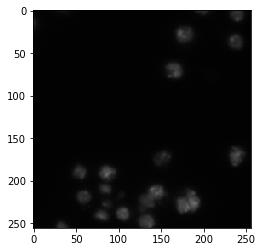

In [27]:
#reading in an image
image = cv2.imread('stage-1/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image


This image is: <class 'numpy.ndarray'> with dimesions: (256, 256)


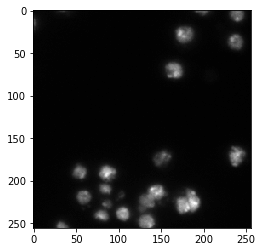

In [28]:
gray = grayscale(image) 
#[...,:3]
print('This image is:', type(gray), 'with dimesions:', gray.shape)
plt.imshow(gray, cmap='gray')

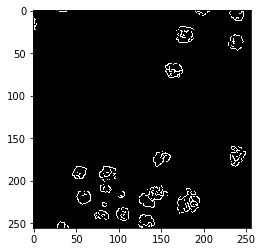

In [29]:
#canny edge detection
canny_image = canny(gray, 30, 60);
plt.imshow(canny_image, cmap='gray')

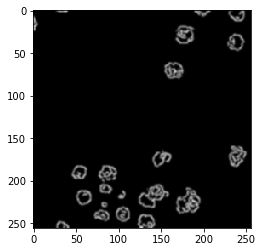

In [30]:
#Gaussian Blurring and Smoothing
canny_gauss_img = gaussian_blur(canny_image, 5);
plt.imshow(canny_gauss_img, cmap='gray')

This image is: <class 'numpy.ndarray'> with dimesions: (256, 256, 3)


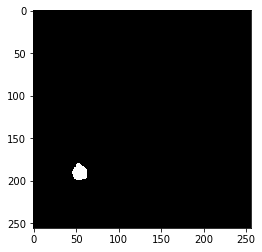

In [31]:
#reading in a mask
mask = cv2.imread('stage-1/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png')
#printing out some stats and plotting
print('This image is:', type(mask), 'with dimesions:', mask.shape)
plt.imshow(mask, cmap="gray")  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image


In [32]:
#Canny edge for mask
#canny_mask = canny(mask, 30, 120);
#plt.imshow(canny_mask, cmap='gray')

[6, 21, 262, 21, 518, 21, 776, 19, 1034, 16, 1292, 10, 1550, 7, 6401, 3, 6657, 3, 6906, 10, 7161, 12, 7415, 14, 7671, 14, 7927, 14, 8183, 8, 8193, 4, 8439, 7, 8449, 4, 8695, 6, 8705, 4, 8951, 14, 9208, 13, 9464, 13, 9720, 13, 9976, 13, 10234, 11, 10490, 11, 10747, 9, 11003, 6, 11261, 4, 11455, 7, 11708, 10, 11962, 14, 12216, 17, 12471, 18, 12726, 19, 12761, 6, 12982, 19, 13015, 11, 13238, 19, 13268, 16, 13494, 19, 13524, 18, 13750, 19, 13779, 20, 14006, 19, 14035, 20, 14262, 19, 14291, 21, 14518, 19, 14547, 21, 14774, 19, 14803, 21, 15030, 19, 15059, 21, 15286, 19, 15315, 21, 15543, 18, 15571, 21, 15799, 17, 15827, 20, 16055, 15, 16083, 20, 16312, 13, 16339, 20, 16569, 10, 16595, 19, 16851, 19, 17108, 18, 17364, 17, 17621, 15, 17879, 12, 18159, 6, 18413, 11, 18668, 12, 18924, 12, 19180, 12, 19393, 5, 19435, 13, 19645, 10, 19690, 14, 19900, 12, 19917, 11, 19946, 15, 20156, 12, 20172, 13, 20202, 15, 20410, 17, 20428, 13, 20449, 8, 20458, 15, 20662, 35, 20705, 24, 20918, 35, 20961, 24, 21

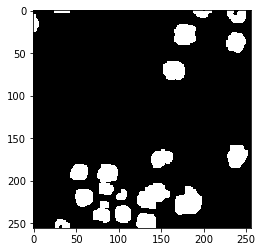

In [33]:
from scipy import ndimage as ndi
fill_holes = ndi.binary_fill_holes(canny_gauss_img)
plt.imshow(fill_holes, cmap="gray")  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image
print (rle_encoding(fill_holes))

stage-1/stage1_train/8cdbdda8b3a64c97409c0160bcfb06eb8e876cedc3691aa63ca16dbafae6f948
stage-1/stage1_train/295ac4ecf2ee0211c065cf5dbb93b1eb8e61347153447209cd110e9c3e355e81
stage-1/stage1_train/237802ac5005f9cf782367156c46c383efd9e05088e5768ca883cbbe24abadb1
stage-1/stage1_train/4b274461c6d001a7a9aeaf5952b40ac4934d1be96b9c176edfd628a8f77e6df2
stage-1/stage1_train/eeb142344e9de3250ab748f93940bf06be70d5078337680998468a134a101698
stage-1/stage1_train/7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80
stage-1/stage1_train/a815a986800a95de0957116c6585deea8ffb6ee09ad00ccc687306937ac698d0
stage-1/stage1_train/6b72b61b80060a9e79a4747f9c5d5af135af9db466681c2d1086f784c7130699
stage-1/stage1_train/718751b439c05bdd589f04fcef321a86be3ecb35292a435138e295e05eb2e771
stage-1/stage1_train/797945873ca2a95f028671714b71eb3f883efe9dae7fcd3fc0ea1521efb73aaa
stage-1/stage1_train/58406ed8ef944831c413c3424dc2b07e59aef13eb1ff16acbb3402b38b5de0bd
stage-1/stage1_train/305a8baaf726d7c9e695bff31d3a6a614

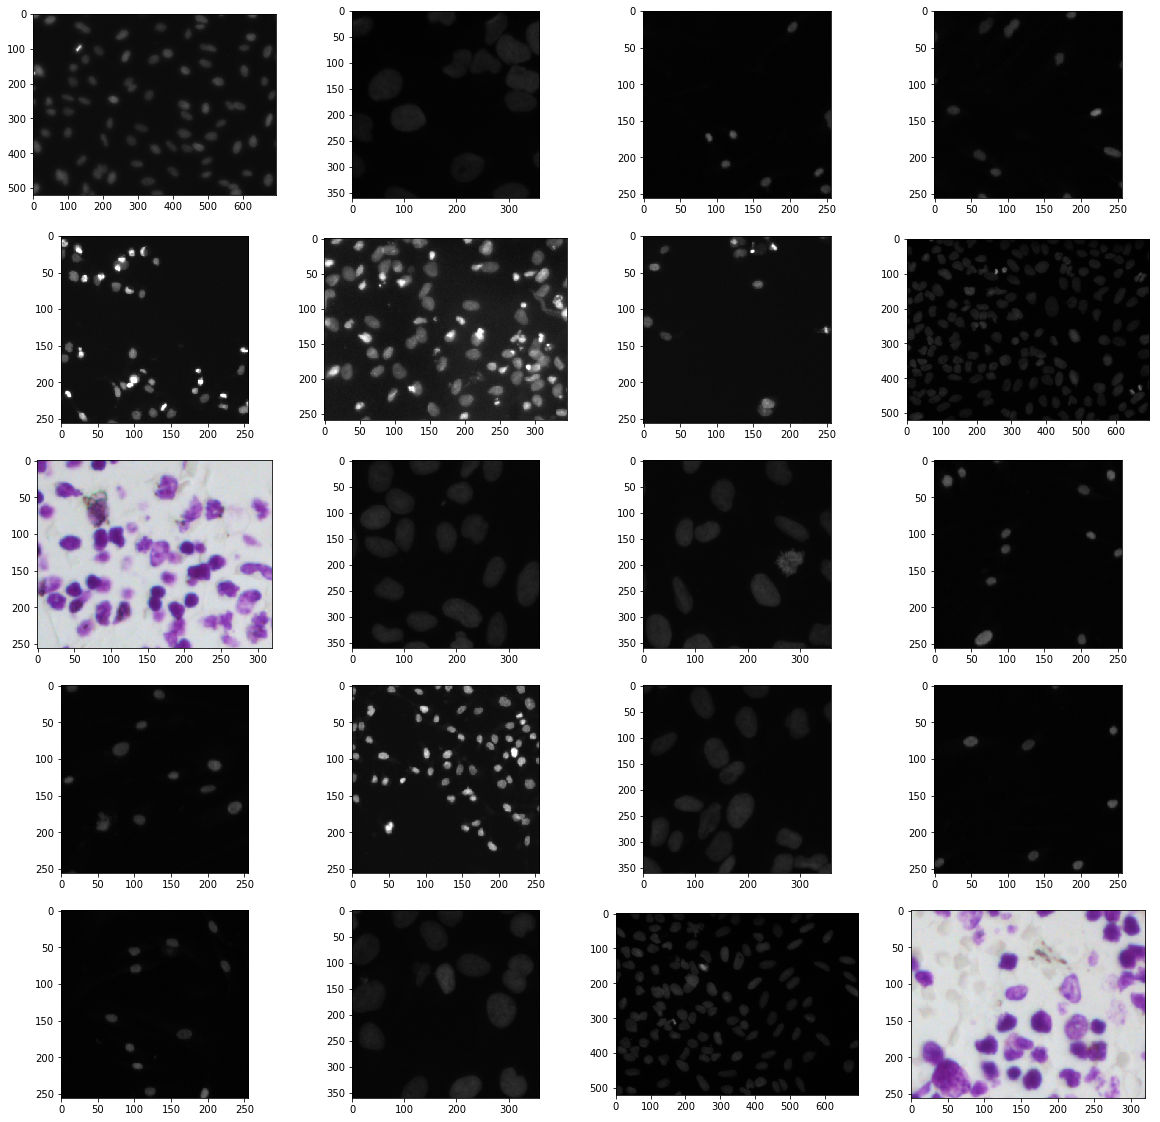

In [34]:
import glob
import os
import scipy.misc

images = glob.glob(os.path.join('stage-1/stage1_train/', '*', 'images', '*'));
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5

for batch_i in range(1, columns*rows +1):
    image = scipy.misc.imread(images[batch_i-1])
    fig.add_subplot(rows, columns, batch_i)
    plt.imshow(image)
    print(os.path.dirname(os.path.dirname(images[batch_i-1])))
plt.show()

In [47]:
import scipy.ndimage
from skimage import util

image = scipy.ndimage.imread('stage-1/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png', mode='L')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape, ' with type ', image.dtype)
print(rle_encoding(util.invert(image)))

This image is: <class 'numpy.ndarray'> with dimesions: (256, 256)  with type  uint8
[]


[9, 10, 25, 1, 266, 9, 522, 9, 779, 8, 1041, 1, 6908, 1, 7161, 8, 7417, 8, 7672, 9, 7928, 9, 8184, 9, 8440, 9, 8696, 9, 8952, 9, 9209, 8, 9465, 8, 9722, 7, 9978, 7, 10235, 6, 10493, 4, 10752, 1, 11966, 4, 12220, 9, 12473, 14, 12729, 15, 12984, 16, 13021, 2, 13238, 19, 13276, 7, 13493, 20, 13528, 12, 13749, 20, 13782, 15, 14005, 20, 14038, 16, 14262, 19, 14293, 17, 14519, 18, 14548, 19, 14776, 16, 14804, 19, 14825, 3, 15032, 16, 15060, 19, 15080, 5, 15288, 15, 15316, 19, 15336, 5, 15545, 14, 15572, 19, 15592, 5, 15802, 13, 15828, 19, 15849, 3, 16060, 10, 16085, 18, 16323, 1, 16341, 18, 16597, 20, 16854, 14, 16869, 5, 17112, 11, 17125, 5, 17381, 5, 17638, 3, 18671, 6, 18926, 8, 19181, 9, 19436, 10, 19691, 11, 19903, 5, 19919, 6, 19947, 11, 20158, 7, 20174, 8, 20203, 12, 20413, 8, 20429, 10, 20459, 12, 20666, 13, 20685, 11, 20706, 5, 20715, 12, 20921, 16, 20941, 12, 20961, 8, 20971, 13, 21176, 17, 21197, 12, 21216, 10, 21227, 14, 21432, 17, 21453, 13, 21472, 10, 21483, 14, 21687, 18, 2170

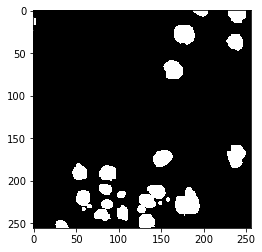

In [46]:
import glob
def read_and_stack(in_img_list):
    return np.sum(np.stack([cv2.imread(c_img) for c_img in in_img_list], 0), 0)/255.0

mask_images = glob.glob('stage-1/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/*')
mask_image_combined = read_and_stack(mask_images)

plt.imshow(mask_image_combined, cmap="gray")  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

print (rle_encoding(mask_image_combined))